In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


## Pre-processamento

In [0]:
df = pd.read_csv('USvideos.csv')

In [97]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [99]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [0]:
def count_unique(x):
  for col in x.columns:
    print(f'{col}: {x[col].nunique()}')

In [101]:
count_unique(df)

video_id: 6351
trending_date: 205
title: 6455
channel_title: 2207
category_id: 16
publish_time: 6269
tags: 6055
views: 40478
likes: 29850
dislikes: 8516
comment_count: 13773
thumbnail_link: 6352
comments_disabled: 2
ratings_disabled: 2
video_error_or_removed: 2
description: 6901


In [102]:
# Drop columns with no important information in our analysis:
#thumbnail_link: link to small image which identify the video in the search results

df.drop(columns='thumbnail_link', inplace=True)
print(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')


In [0]:
# Read json with category_id names and assign the names in new dataframe column 

import json

# open json file with category names
with open('US_category_id.json', 'r') as f:
  categ_us = json.load(f)

categ_dic = {}

for k in categ_us['items']:
  categ_dic[k['id']]= k['snippet']['title']

#print(categ_dic)

# Creating new column with category names
temp = df.category_id.copy()
temp = temp.astype('str')
df['category_name'] = temp.map(categ_dic)

#print(df.loc[:10, ['category_id', 'category_name']])


### Temporal distributions

Total samples per year:
 2018    31349
2017     9600
Name: trending_date, dtype: int64


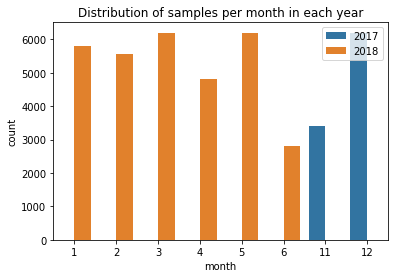

In [104]:
# Processing the time feature

df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m')

year_counts = df.trending_date.dt.year.value_counts()
print('Total samples per year:\n', year_counts) 

df['year'] = df.trending_date.dt.year
df['month'] = df.trending_date.dt.month

# Plot distribution of samples per time 
sns.countplot(data=df, x = 'month', hue='year')
plt.title('Distribution of samples per month in each year')
plt.legend(['2017', '2018'])


In [0]:
# Divide per year 
df_2017 = df[df.trending_date.dt.year == 2017]
df_2018 = df[df.trending_date.dt.year == 2018]


Video popularity rank varies a lot between the months

In [0]:
# 2017
var = 'likes'
mon = 12 #11-12

In [107]:
df_2017.loc[df.trending_date.dt.month == mon, ['video_id', 'title', var]].groupby(['video_id', 'title']).sum().sort_values(var, ascending = False).head(10)

,,likes
video_id,title,
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Official Trailer,19819535
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,19781372
SM1w9PEQOE8,Demi Lovato - Tell Me You Love Me,8379638
WS7f5xpGYn8,Katy Perry - Hey Hey Hey (Official),6776063
khPLWaBioOs,Logan Paul - SANTA DISS TRACK (Official Music Video),6354734
817P8W8-mGE,Ed Sheeran - Perfect Duet (with Beyoncé) [Official Audio],6047721
JcdLF6XQ0iw,PANCAKE ART CHALLENGE 4!!! Learn How To Make Mario Odyssey Star Wars Jedi Nintendo Food DIY Pancake,5996526
eiDiKwbGfIY,Ed Sheeran - Perfect Symphony (with Andrea Bocelli),5923033
l_lblj8Cq0o,"G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi B, French Montana, Juicy J, Belly",5520912


In [0]:
# 2018
var = 'likes'
mon = 1 # 1-6

In [0]:
temp = df_2018.loc[df.trending_date.dt.month == mon, ['video_id', 'title', var]].groupby(['video_id', 'title']).sum().sort_values(var, ascending = False)[:10]

In [129]:
temp.reset_index(inplace=True)
temp

,video_id,title,likes
0,oWjxSkJpxFU,Suicide: Be Here Tomorrow.,12282280
1,dfnCAmr569k,"Taylor Swift - End Game ft. Ed Sheeran, Future",11127424
2,LsoLEjrDogU,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,9188754
3,QwZT7T-TXT0,So Sorry.,8495733
4,Mgfe5tIwOj0,Dua Lipa - IDGAF (Official Music Video),6866042
5,VRJmcxCrAOA,Real Life Trick Shots 2 | Dude Perfect,6206553
6,J41qe-TM1DY,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,5722350
7,eACohWVwTOc,The Chainsmokers - Sick Boy,3030806
8,k5TqNsr6YuQ,Troye Sivan - My My My!,2965742
9,ryr75N0nki0,Eminem - Walk On Water (Official Video) ft. Be...,2646590


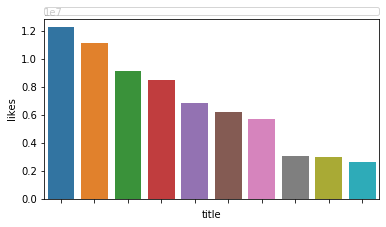

In [133]:

import matplotlib.patches as mpatches

labels = temp.title


fig, ax = plt.subplots()
ax = sns.barplot(data=temp,x='title',y='likes',ax=ax)
ax.set_xticklabels('')

leg_handles = []
for label,artist in zip(labels,ax.artists):
    handle = mpatches.Patch(facecolor=artist.get_facecolor(),label=label)
    leg_handles.append(handle)

ax.legend(handles=leg_handles,bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
fig.subplots_adjust(top=0.75)

In [132]:
temp.melt(id_vars='title')

,title,variable,value
0,Suicide: Be Here Tomorrow.,video_id,oWjxSkJpxFU
1,"Taylor Swift - End Game ft. Ed Sheeran, Future",video_id,dfnCAmr569k
2,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,video_id,LsoLEjrDogU
3,So Sorry.,video_id,QwZT7T-TXT0
4,Dua Lipa - IDGAF (Official Music Video),video_id,Mgfe5tIwOj0
5,Real Life Trick Shots 2 | Dude Perfect,video_id,VRJmcxCrAOA
6,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,video_id,J41qe-TM1DY
7,The Chainsmokers - Sick Boy,video_id,eACohWVwTOc
8,Troye Sivan - My My My!,video_id,k5TqNsr6YuQ
9,Eminem - Walk On Water (Official Video) ft. Be...,video_id,ryr75N0nki0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48731 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_

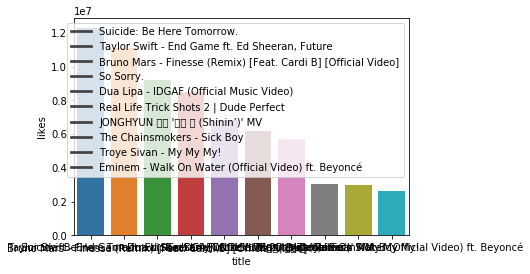

In [125]:
temp.reset_index(inplace=True)
sns.barplot(x='title', y = var, data=temp)
plt.legend(temp.title)